In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

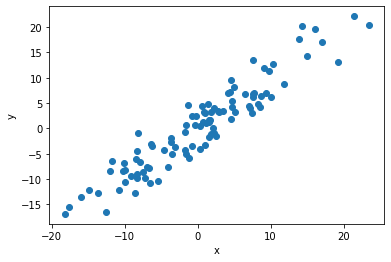

In [2]:
#Generate random point from normal distribution
X = torch.randn(100, 1)*8
#Add noise to the generated points
y = X + torch.randn(100, 1)*3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(10)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [6]:
#Training 100 epochs
epochs = 100
losses = []
for i in range(epochs):
    y_pred_value = model.forward(X)
    loss = mse_loss(y_pred_value, y)
    print('Epochs:', i + 1, ' Loss:', loss.item())
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs: 1  Loss: 86.36109161376953
Epochs: 2  Loss: 25.5261287689209
Epochs: 3  Loss: 12.061422348022461
Epochs: 4  Loss: 9.081028938293457
Epochs: 5  Loss: 8.421100616455078
Epochs: 6  Loss: 8.274764060974121
Epochs: 7  Loss: 8.242110252380371
Epochs: 8  Loss: 8.234628677368164
Epochs: 9  Loss: 8.232728004455566
Epochs: 10  Loss: 8.232071876525879
Epochs: 11  Loss: 8.231701850891113
Epochs: 12  Loss: 8.231402397155762
Epochs: 13  Loss: 8.231127738952637
Epochs: 14  Loss: 8.230866432189941
Epochs: 15  Loss: 8.23061752319336
Epochs: 16  Loss: 8.230377197265625
Epochs: 17  Loss: 8.230147361755371
Epochs: 18  Loss: 8.229925155639648
Epochs: 19  Loss: 8.229713439941406
Epochs: 20  Loss: 8.229509353637695
Epochs: 21  Loss: 8.229312896728516
Epochs: 22  Loss: 8.229125022888184
Epochs: 23  Loss: 8.228943824768066
Epochs: 24  Loss: 8.22877025604248
Epochs: 25  Loss: 8.22860336303711
Epochs: 26  Loss: 8.228442192077637
Epochs: 27  Loss: 8.228288650512695
Epochs: 28  Loss: 8.228141784667969
Epoc

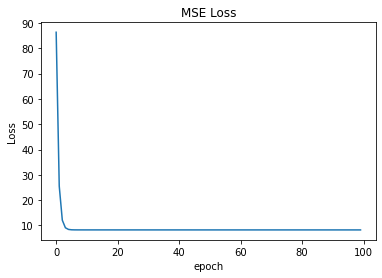

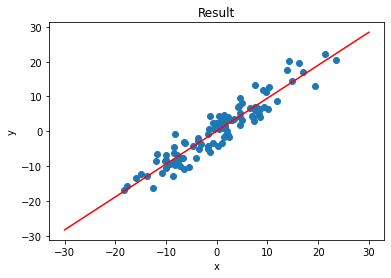

The trained model has weight: 0.946557879447937 , bias: 0.06027453765273094


In [7]:
#Plot Loss Function
plt.plot(range(epochs), losses)
plt.title('MSE Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

#Plot the result line
[w, b] = model.parameters()
w = w[0][0].detach().numpy()
b = b[0].detach().numpy()
plt.title('Result')
plt.ylabel('y')
plt.xlabel('x')
x1 = np.array([-30, 30])
y1 = w * x1 + b
plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.show()
print('The trained model has', 'weight:', w.item(), ', bias:', b.item())
